In [3]:
import pandas as pd 
import numpy as np 


In [4]:
import lightgbm

In [5]:
dataset = pd.read_csv("data/creditcard.csv")

In [6]:
dataset.drop("Time", inplace=True, axis=1)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(dataset.drop("Class",axis=1),dataset['Class'], test_size=0.3,random_state=1)

In [8]:
model = lightgbm.LGBMClassifier(random_state=1, n_estimators=1000, max_depth=5, learning_rate=0.01, num_leaves=2**5, num_threads=7, boosting_type='gbdt')

In [9]:
model.fit(X_train,y_train)

[LightGBM] [Warning] num_threads is set=7, n_jobs=-1 will be ignored. Current value: num_threads=7


LGBMClassifier(learning_rate=0.01, max_depth=5, n_estimators=1000,
               num_leaves=32, num_threads=7, random_state=1)

In [10]:
from sklearn.metrics import *

In [11]:
recall_score(y_test,model.predict(X_test))

0.7703703703703704

In [12]:
precision_score(y_test,model.predict(X_test))

0.9369369369369369

In [13]:
f1_score(y_test, model.predict(X_test))

0.8455284552845529

In [14]:
import shap

In [15]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


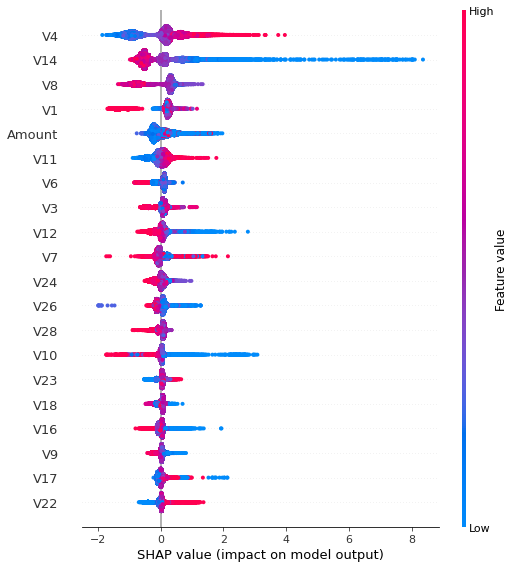

In [16]:
shap.summary_plot(shap_values[1], X_test)


In [17]:
shaps_df = pd.DataFrame(shap_values[1])
shaps_df.columns=['SHAP_' + x for x in X_test.columns]



In [18]:
shaps_df

,SHAP_V1,SHAP_V2,SHAP_V3,SHAP_V4,SHAP_V5,SHAP_V6,SHAP_V7,SHAP_V8,SHAP_V9,SHAP_V10,...,SHAP_V20,SHAP_V21,SHAP_V22,SHAP_V23,SHAP_V24,SHAP_V25,SHAP_V26,SHAP_V27,SHAP_V28,SHAP_Amount
0,0.267923,0.026187,0.169833,0.096680,0.088865,-0.172885,-0.009762,0.315159,0.025805,-0.002187,...,-0.011126,-0.021993,0.010222,0.036375,-0.050634,0.046767,0.190661,0.002139,-0.287962,0.369382
1,0.222537,-0.031799,-0.360517,0.035063,-0.028003,0.101742,-0.047244,-0.671800,0.051561,0.016573,...,-0.037300,-0.023017,-0.018498,0.070905,0.163206,-0.011108,-0.182037,-0.015834,-0.088012,0.215495
2,0.313281,0.043180,0.157133,0.132564,0.082823,0.016414,-0.140499,0.332134,0.050939,0.063899,...,-0.052215,0.027764,-0.021751,0.077856,0.245989,0.032576,-0.141817,-0.058087,0.009714,0.261684
3,0.188888,0.035897,-0.172114,-0.928315,-0.037736,0.099604,-0.127117,0.269727,-0.001978,0.020701,...,-0.032644,-0.113817,-0.067512,-0.088461,0.047333,0.040821,-0.148740,0.017104,0.125661,-0.227118
4,0.174788,0.034531,0.120766,1.174252,-0.099159,-0.262002,-0.010835,0.366207,0.046293,0.068214,...,-0.060793,-0.035104,-0.028320,0.068364,0.076332,-0.110480,-0.010806,-0.046696,-0.032273,0.414024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,0.158552,0.041024,0.238311,1.314426,-0.093363,0.138800,-0.037225,0.540607,-0.071655,0.080878,...,-0.040831,-0.132675,0.019527,-0.107559,0.158676,-0.109952,-0.088988,0.039752,0.054917,-0.260550
85439,-0.840244,0.021435,0.020947,-0.445624,0.071210,-0.254195,-0.028524,-0.580335,0.005787,0.023987,...,-0.038124,-0.022372,-0.023075,0.022921,-0.161585,0.019072,0.052949,0.004756,0.070395,-0.140412
85440,0.246434,0.047563,-0.558384,0.861696,0.115187,0.147481,-0.161775,0.449455,0.086915,-0.007994,...,-0.069358,-0.019974,-0.005285,0.164845,0.602639,0.006854,0.042434,0.021400,-0.013061,-0.236645
85441,-1.384565,0.031557,0.044517,0.124364,-0.081379,0.115247,0.155819,0.329918,-0.149688,0.034328,...,-0.043882,0.017633,0.074342,0.026348,0.108705,0.035058,-0.098893,0.017509,0.013518,-0.035344


In [19]:
positive_shaps_df = shaps_df.apply(lambda x: x>0).astype(int)
positive_shaps_df

,SHAP_V1,SHAP_V2,SHAP_V3,SHAP_V4,SHAP_V5,SHAP_V6,SHAP_V7,SHAP_V8,SHAP_V9,SHAP_V10,...,SHAP_V20,SHAP_V21,SHAP_V22,SHAP_V23,SHAP_V24,SHAP_V25,SHAP_V26,SHAP_V27,SHAP_V28,SHAP_Amount
0,1,1,1,1,1,0,0,1,1,0,...,0,0,1,1,0,1,1,1,0,1
1,1,0,0,1,0,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,1
2,1,1,1,1,1,1,0,1,1,1,...,0,1,0,1,1,1,0,0,1,1
3,1,1,0,0,0,1,0,1,0,1,...,0,0,0,0,1,1,0,1,1,0
4,1,1,1,1,0,0,0,1,1,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,1,1,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
85439,0,1,1,0,1,0,0,0,1,1,...,0,0,0,1,0,1,1,1,1,0
85440,1,1,0,1,1,1,0,1,1,0,...,0,0,0,1,1,1,1,1,0,0
85441,0,1,1,1,0,1,1,1,0,1,...,0,1,1,1,1,1,0,1,1,0


In [20]:
from mlxtend.frequent_patterns import fpgrowth

In [21]:
frequent_itemsets = fpgrowth(positive_shaps_df, min_support=0.01, use_colnames=True)


In [22]:
frequent_itemsets

,support,itemsets
0,0.884660,(SHAP_V2)
1,0.850485,(SHAP_V1)
2,0.780368,(SHAP_V23)
3,0.766640,(SHAP_V3)
4,0.728650,(SHAP_V9)
...,...,...
6026104,0.011364,"(SHAP_V20, SHAP_V23, SHAP_V16, SHAP_V5, SHAP_V..."
6026105,0.011247,"(SHAP_V20, SHAP_V16, SHAP_V9, SHAP_V5, SHAP_V1..."
6026106,0.010053,"(SHAP_V20, SHAP_V2, SHAP_V16, SHAP_V9, SHAP_V5..."
6026107,0.011025,"(SHAP_V20, SHAP_V16, SHAP_V5, SHAP_V25, SHAP_V..."


In [23]:
frequent_itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


In [35]:
frequent_itemsets[frequent_itemsets['length'] > 2].sort_values("support", ascending=False)

,support,itemsets,length
32,0.554498,"(SHAP_V23, SHAP_V2, SHAP_V1)",3
44,0.551327,"(SHAP_V9, SHAP_V2, SHAP_V1)",3
36,0.548916,"(SHAP_V3, SHAP_V2, SHAP_V1)",3
2758800,0.542689,"(SHAP_V6, SHAP_V2, SHAP_V1)",3
2758865,0.537563,"(SHAP_V10, SHAP_V2, SHAP_V1)",3
...,...,...,...
4733456,0.010007,"(SHAP_V23, SHAP_V13, SHAP_V27, SHAP_V22, SHAP_...",9
873649,0.010007,"(SHAP_V26, SHAP_V23, SHAP_V14, SHAP_V3, SHAP_V...",10
3126397,0.010007,"(SHAP_V10, SHAP_V23, SHAP_V11, SHAP_V4, SHAP_V...",8
630083,0.010007,"(SHAP_V10, SHAP_V23, SHAP_V2, SHAP_V14, SHAP_V...",11


In [25]:
mask = frequent_itemsets['itemsets'].map(lambda x: 'SHAP_V4' in set(x))

In [41]:
frequent_itemsets[mask & (frequent_itemsets['length'] > 2)].sort_values('support',ascending=False).head(50)

,support,itemsets,length
222,0.480297,"(SHAP_V4, SHAP_V2, SHAP_V1)",3
226,0.463092,"(SHAP_V23, SHAP_V4, SHAP_V2)",3
223,0.457358,"(SHAP_V4, SHAP_V2, SHAP_V3)",3
224,0.429503,"(SHAP_V4, SHAP_V3, SHAP_V1)",3
648,0.428531,"(SHAP_V4, SHAP_V6, SHAP_V2)",3
227,0.427560,"(SHAP_V23, SHAP_V4, SHAP_V1)",3
233,0.426249,"(SHAP_V4, SHAP_V2, SHAP_V25)",3
228,0.423686,"(SHAP_V23, SHAP_V4, SHAP_V3)",3
391,0.422188,"(SHAP_V4, SHAP_V8, SHAP_V2)",3
646,0.421392,"(SHAP_V4, SHAP_V6, SHAP_V1)",3


In [51]:
v4_index = positive_shaps_df[(positive_shaps_df['SHAP_V4']==1) & (positive_shaps_df['SHAP_V14']==1)].index

In [52]:
np.mean(y_test)

0.0015800007022225343

In [54]:
np.mean(y_test.values[v4_index])

0.00525680799724233

In [55]:
(0.00525680799724233-0.0015800007022225343) / 0.0015800007022225343#delta percentuale

2.3270921904324178

In [49]:
#si può anche calcolare il lift per ogni sottogruppo di items individuati num (positivi nel gruppo / num gruppo) / eventomedio

In [56]:
0.00525680799724233 / 0.0015800007022225343 #lift con sottogruppo shap_v14=1 e shap_v4=1

3.3270921904324178

In [ ]:
import pickle

files_objects = [("model.pk",model),("shap_values.pk",shap_values),("frequent_itemsets.pk",frequent_itemsets)]